# COMP2200/COMP6200: Data Science
## Lecture Week 4 
#### Modified by Dr Xuhui Fan


## Agenda

- Brief overview of Portfolio 1
- Correlation and Causation
- Hypothesis testing
- Visualisation
- Good Graphs

## Correlation

- The term "correlation" refers to a mutual relationship or association between quantities.
- Correlation is useful to express one quantity in terms of its relationship with others.
- For example: Sales might increase when the marketing department spends more on TV advertisements
- Correlation is the first step to understand these relationships and subsequently build better business and statistical models.

<div style="float: center">
    <img src="correlation.png" alt="Correlation" width="600" height="500">
</div>


## Why ``correlation`` is important?

- Correlation can help in predicting one quantity from another
- Correlation can indicate the presence of a causal relationship
- Correlation is used as a basic quantity and foundation for many other modeling techniques

## Types of correlation

- **Positive correlation**: If due to increase of any of the two data, the other data also increases. Example: Height and weight of humans.
- **Negative correlation**: If due to increase of any of the two data, the other decreases. Example: Price and demand of a commodity
- **Zero correlation**: If there is no clear-cut trend, i.e., change is one does not guarantee the co-directional change in the other. Example: Intelligence and kindness.
- **Spurious correlation**: If the correlation is due to the influence of any other "third" variable. Example: children with clumsiness has been reported as being associated with parent's obesity. Clumsy kids participate less in sports and outdoor activitiess and hence there is an indirect relationship.

In [6]:
# Reading auto-mpg data MPG, or miles per gallon, is the distance, measured in miles, 
#that a car can travel per gallon of fuel. MPG is also the primary measurement of a car's fuel efficiency: 
#The higher a car's MPG, the more fuel efficient it is.
import pandas as pd
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
#https://www.kaggle.com/datasets/uciml/autompg-dataset

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None, #https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')
mpg_data.head(10)

C:\Users\tyler\AppData\Local\Temp\ipykernel_400304\300067425.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mpg_data = pd.read_csv(path, delim_whitespace=True, header=None, #https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [7]:
mpg_data.shape
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [10]:
# Let's check correlation between mpg and weight
mpg_data['mpg'].corr(mpg_data['weight'])
print(mpg_data['mpg'].corr(mpg_data['weight']))

# Checking correlation between cylinders and weight
print(mpg_data['cylinders'].corr(mpg_data['weight']))


-0.8317409332443345
0.8960167954533947


[Documentation for drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [18]:
## Let's check correlation on the dataframe
#axis=0 or index; 1 or column
new_df = mpg_data.drop(['model_year', 'origin', 'name'], axis=1)
print(new_df.head())

# calculating correlation between all columns in dataframe
new_df.corr()

    mpg  cylinders  displacement  horsepower  weight  acceleration
0  18.0          8         307.0       130.0  3504.0          12.0
1  15.0          8         350.0       165.0  3693.0          11.5
2  18.0          8         318.0       150.0  3436.0          11.0
3  16.0          8         304.0       150.0  3433.0          12.0
4  17.0          8         302.0       140.0  3449.0          10.5


,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


[seaborn heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[Text(0.5, 0, 'mpg'),
 Text(1.5, 0, 'cylinders'),
 Text(2.5, 0, 'displacement'),
 Text(3.5, 0, 'horsepower'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'acceleration')]

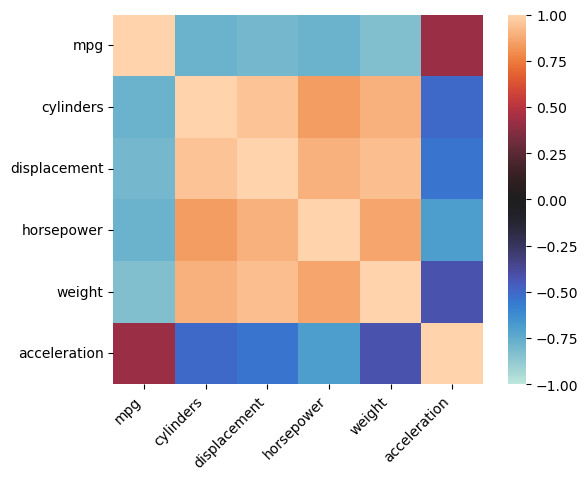

In [21]:
# Make a correlation matrix heatmap to visualise it better
import seaborn as sns
corr = new_df.corr()
ax = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

[seaborn.load_dataset()](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

In [23]:
# import iris dataset

import seaborn as sns
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
iris['species'].unique().tolist() #Return a list of the values. isin(), https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

['setosa', 'versicolor', 'virginica']

In [27]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

[seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

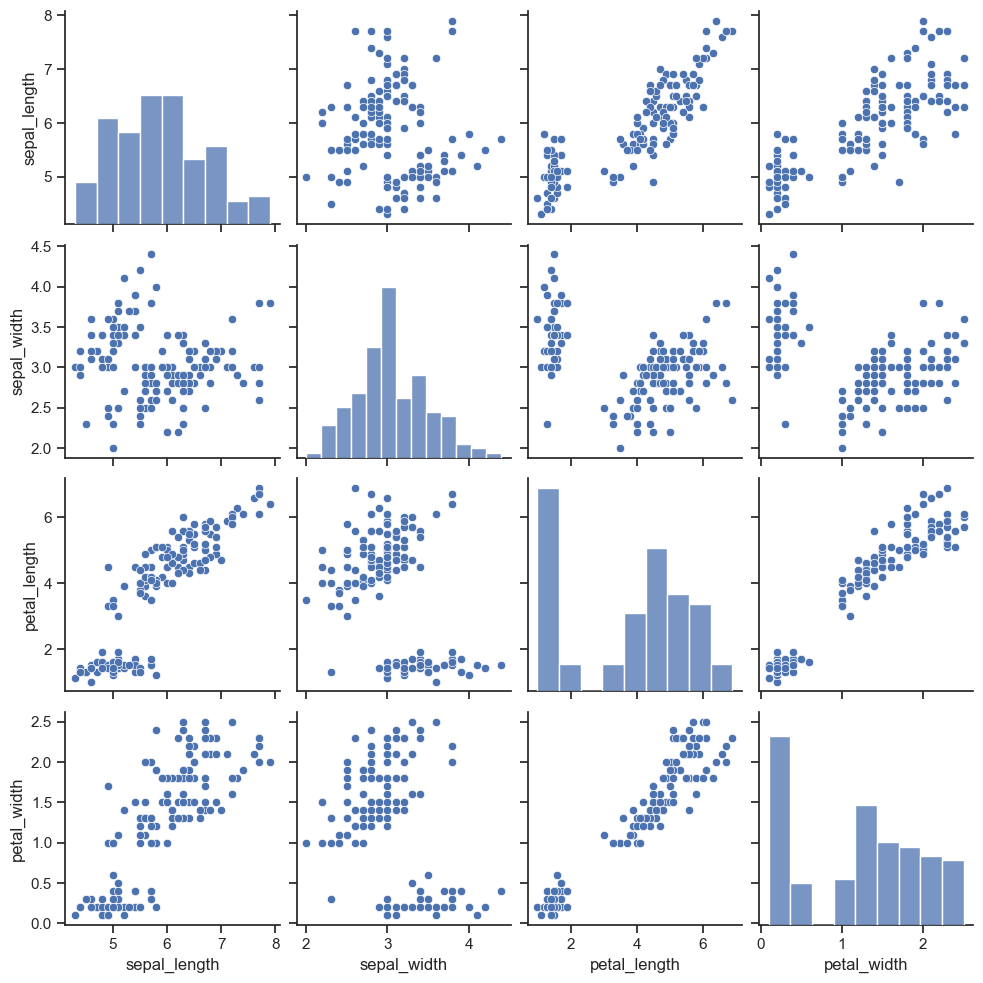

In [32]:
# Pairplot on iris dataset
g = sns.pairplot(iris)

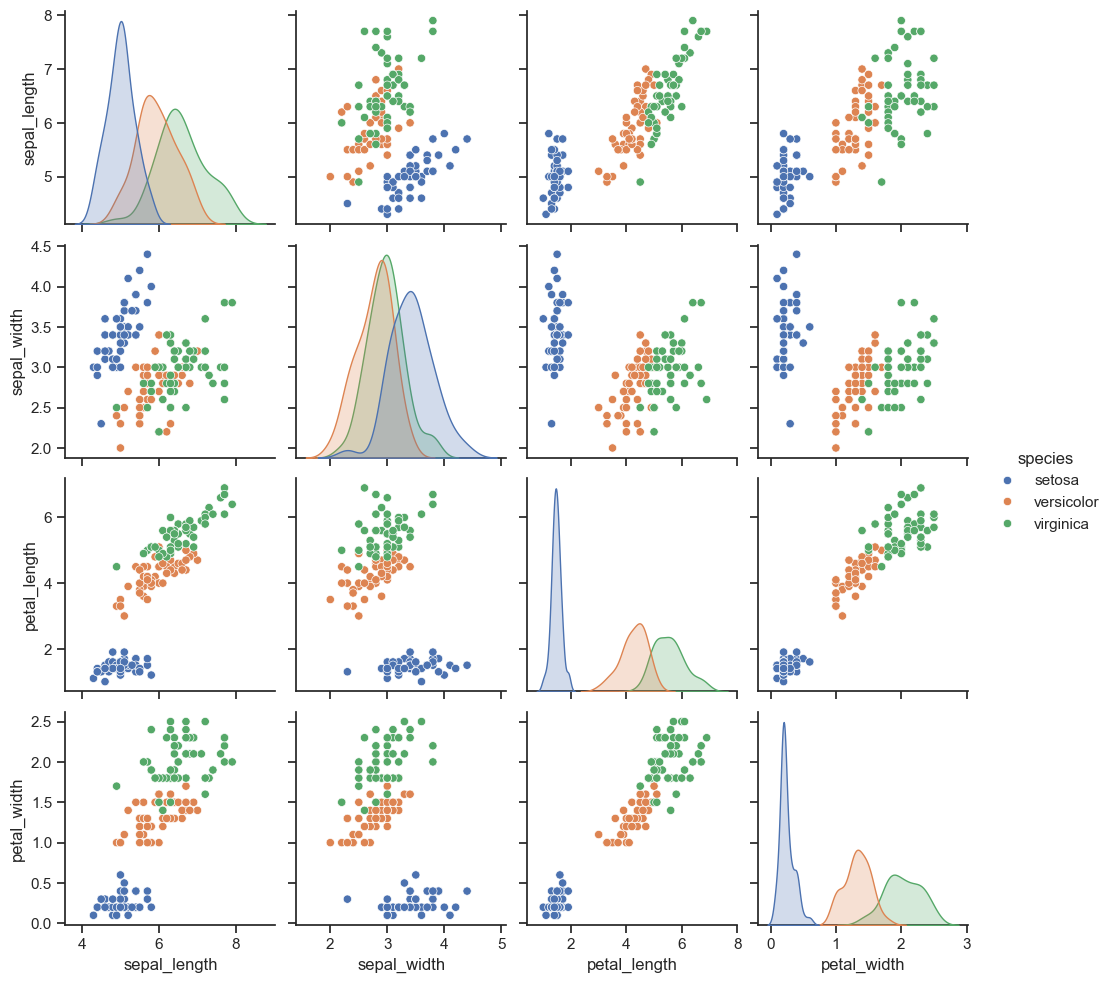

In [33]:
# Plot by plotting with variable in different colors
g = sns.pairplot(iris, hue="species") #hue, variable in data to map plot aspects to different colors

## Some more examples

- [Geospatial data Visualisation](https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621)

- [Chord Chart](https://www.data-to-viz.com/graph/chord.html)

- [Chord Chart Example](https://holoviews.org/gallery/demos/bokeh/route_chord.html)

- [Making a complete Dashboard](https://towardsdatascience.com/data-visualization-with-bokeh-in-python-part-iii-a-complete-dashboard-dc6a86aa6e23)

- [Different types of Visualisation](https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/Jupyter%20Visualizations.ipynb)


## Main plotting libraries

- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Bokeh](https://docs.bokeh.org/en/latest/index.html#)
- [Plotly](https://plot.ly/)
- [geoplotlib](https://github.com/andrea-cuttone/geoplotlib)
- [pygal](http://www.pygal.org/en/stable/)
- [Altair](https://altair-viz.github.io/)

[Python Data Visualization Libraries for Any Discipline](https://mode.com/blog/python-data-visualization-libraries/)

## Correlation is not causation

- [Average IQ of students](http://www.randalolson.com/2014/06/25/average-iq-of-students-by-college-major-and-gender-ratio/)

- [Correlation vs Causation](https://amplitude.com/blog/causation-correlation)





Here's a discussion [from the Computation and Inferential Thinking text](https://www.inferentialthinking.com/chapters/02/causality-and-experiments.html):

>Observation is a key to good science. An **observational study** is one in which scientists make conclusions based on data that they have observed but had no hand in generating. In data science, many such studies involve observations on a group of individuals, a factor of interest called a **treatment**, and an **outcome** measured on each individual.

>It is easiest to think of the **individuals** as people. In a study of whether chocolate is good for the health, the individuals would indeed be people, the treatment would be **eating chocolate**, and the outcome might be a measure of **blood pressure**. But individuals in observational studies need not be people. In a study of whether the death penalty has a deterrent effect, the individuals could be the **50 states of the union**. A state law **allowing the death penalty** would be the treatment, and an outcome could be the state’s **murder rate**.
    

>The fundamental question is whether the treatment has an effect on the outcome. Any relation between the treatment and the outcome is called an **association**. If the treatment causes the outcome to occur, then the association is **causal**. Causality is at the heart of all three questions posed at the start of this section. For example, one of the questions was whether chocolate directly causes improvements in health, not just whether there there is a relation between chocolate and health.

### Confounding Factors

To establish causality we first need to observe a correlation, but then we need to be sure that this is not due to some **confounding** factor: a variable that we have not measured or understood, that accounts for the association we observe.  

Again from [C&I Thinking](https://www.inferentialthinking.com/chapters/02/3/establishing-causality.html):

>**Example: Coffee and lung cancer.** Studies in the 1960’s showed that coffee drinkers had higher rates of lung cancer than those who did not drink coffee. Because of this, some people identified coffee as a cause of lung cancer. But coffee does not cause lung cancer. The analysis contained a confounding factor – smoking. In those days, coffee drinkers were also likely to have been smokers, and smoking does cause lung cancer. Coffee drinking was associated with lung cancer, but it did not cause the disease.

## Randomisation

One defence against confounding factors in experiments is to select the treatment and control groups at random from a larger population. If we suspect that some other factors may be important, we can ensure that the two groups are balanced for that factor.  For example, we might ensure that there are equal numbers of males and females in each group.  Selecting people at random is a way of doing this.

A **blind** randomised trial is one where the members of each group don't know which group they are in. Are they getting a treatment or not? In a medical setting this would involve the use of a **placebo** - it is well known that people will often feel better just because they know they are being treated.


A **double blind** trial is one where the researchers don't know which group people are in either. This prevents any effects where the researcher might unconciously influence the outcome of the experiment.  Obviously in some cases, double blind is not feasible.

## Theory and Explanation

While we can establish an association between a treatment and an outcome, and eliminate as many confounding factors as we understand, we become more convinced of the argument for a causal link if there is also a good theoretical explanation for what is observed.  This might be based on simple Physics (more weight means more fuel) or on a complex biological explanation of a disease phenomenon (smoking causes cancer).  

The theory is strenthened by the observations, but a good theory will also make **predictions** that can be tested in future experiments.  Thinking back to our earlier discussion of the **science** in **data science**: a good theory should be falsifiable, there should be an experiment you can do that if it failed, would disprove the theory.  All of this goes together to give us sound explanations for what we see around us and advance our knowledge.

## Summary

- Correlation is a measure of the association between two variables
- In an experiment, we collect data generally trying to establish a causal relationship 
- Confounding factors can mean that an association is observed when there is no causal link
- To gather evidence for causality, we need more than an observed relationship, we need to exclude confounding factors and to provide some kind of theoretical explanation

## Statistical Hypothesis Testing"

### Source: [A Gentle Introduction to Statistical Hypothesis Testing](https://machinelearningmastery.com/statistical-hypothesis-tests/)

#### "Data alone is not interesting. It is the interpretation of the data that we are really interested in."

- In statistics, a hypothesis test calculates some quantity under a given assumption. The result of the test allows us to interpret whether the assumption holds or whether the assumption has been violated.

- The assumption of a statistical test is called the null hypothesis, or hypothesis 0 (H0 for short). A violation of the test’s assumption is often called the first hypothesis, hypothesis 1 or H1 for short.

- **Hypothesis 0 (H0)**: Assumption of the test holds and is failed to be rejected at some level of significance.

- **Hypothesis 1 (H1)**: Assumption of the test does not hold and is rejected at some level of significance.

- A statistical hypothesis test returns *p-value* or *critical value* to interpret the results. 


## Goal of hypothesis testing

### Source: [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

- To accept or reject a given hypothesis in a **statistically significant** manner

- **statistically significant**: 

- How confident we are about our decision

or

- How likely is it that the result is unaffected by chance.

- **Walk through example**: [How to Ensure the Best Results Possible with Sample Size](https://dbseer.com/data-science-101-why-does-correlation-hypothesis-testing-matter-data-analysis/)

- **[Employees with high IQ](https://www.educative.io/courses/grokking-data-science/m2298YyJPOR)**

- **[Stocks, Significance testing, and p-hacking](https://www.datacamp.com/community/tutorials/stocks-significance-testing-p-hacking)**

[multivariate_normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html)


(100, 2) (100, 2)
(200, 2)


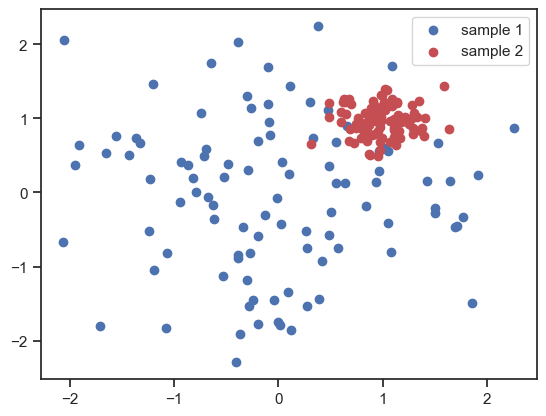

In [38]:
#Matplotlib limitations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# fix the seed, to reproduce the random sample process
np.random.seed(7) #https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do

sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100) #Draw random samples from a multivariate normal distribution.
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 100)
print(sample1.shape, sample2.shape)
sample = np.concatenate([sample1, sample2])
print(sample.shape)
data_points_1=plt.scatter(sample1[:,0],sample1[:,1],c="b")
data_points_2=plt.scatter(sample2[:,0],sample2[:,1],c="r")
#plt.legend()

plt.legend([data_points_1, data_points_2], ['sample 1','sample 2'])

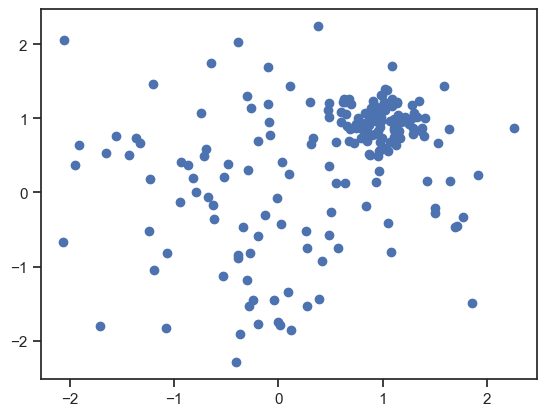

In [48]:
plt.scatter(sample[:,0],sample[:,1])

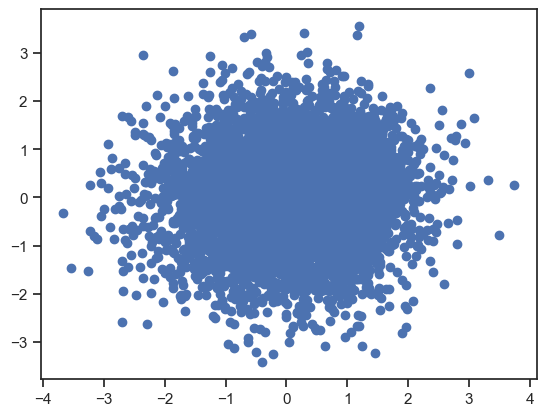

In [49]:
## Lets add more points now
sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 5000)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 5000)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])

## Bokeh

Bokeh is an interactive visualization library that targets modern web browsers for presentation. 

It is good for:

- Interactive visualization in modern browsers
- Standalone HTML documents, or server-backed apps
- Expressive and versatile graphics
- Large, dynamic or streaming data
- Easy usage from python (or Scala, or R, or...)


In [50]:
# Source: https://thedatafrog.com/en/interactive-visualization-bokeh-jupyter/
#python3 -m pip install bokeh
#python3 -m pip install --upgrade bokeh

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()



tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)
show(p)

Loading BokehJS ...

In [51]:
# Adding widgets 
from ipywidgets import widgets #Jupyter Widgets are interactive browser controls for Jupyter notebooks

# Buttons
button = widgets.Button(description="click Me!")
display(button)

def on_button_clicked(b):
    print("Welcome to COMP6200: Data Science")

button.on_click(on_button_clicked)


Button(description='click Me!', style=ButtonStyle())

In [52]:
import ipywidgets as widgets

inputText = widgets.Text()

# Ensure outputText is defined to display the uppercase result
outputText = widgets.Text()

def makeUpperCase(change):
    if change['type'] == 'change' and change['name'] == 'value':
        outputText.value = change['new'].upper()

# Attach the callback function to observe changes in 'value'
inputText.observe(makeUpperCase, names='value')

# Display the input text widget and then the output widget to see the result
display(inputText)
display(outputText)


Text(value='')

Text(value='')

In [53]:
#https://docs.bokeh.org/en/2.4.0/docs/user_guide/interaction/callbacks.html
#https://www.geeksforgeeks.org/add-interactive-slider-to-bokeh-plots/
#https://docs.bokeh.org/en/latest/docs/user_guide/data.html
##https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Math/pow


#Import Statements
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
#Data Preparation
x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))
#Plot Setup
plot = figure(width=400, height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
#Slider Widget
slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")  
#JavaScript Callback  
#"power" refers to the exponent applied to the x-values in the plot
update_curve = CustomJS(args=dict(source=source, slider=slider), code=""" 
    var data = source.data;
    var f = slider.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f) 
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve) #Interaction Setup  

 
show(column(slider, plot)) #Display

In [54]:
# https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/Jupyter%20Visualizations.ipynb
